## Problem statement - 1

# Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)
 


In [3]:
#Import Libraries
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("Elon_musk.csv",encoding='unicode_escape')

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4E28-3FB0

 Directory of C:\Users\HP\Desktop\Assignments\assignment no.11 (Text Mining)

12/30/2022  10:16 AM    <DIR>          .
12/30/2022  10:16 AM    <DIR>          ..
12/30/2022  10:10 AM    <DIR>          .ipynb_checkpoints
12/14/2022  02:59 PM               217 Assignment.txt
12/14/2022  02:52 PM           170,848 Elon_musk.csv
12/14/2022  02:52 PM            46,299 negative-words.txt
12/14/2022  02:52 PM            20,630 positive-words.txt
12/14/2022  02:52 PM             4,158 stop.txt
12/29/2022  01:36 PM           517,205 Text Mining.ipynb
12/29/2022  10:05 AM           456,213 Untitled.ipynb
12/30/2022  10:16 AM           484,254 Updated_Text Mining .ipynb
               8 File(s)      1,699,824 bytes
               3 Dir(s)  136,100,167,680 bytes free


In [6]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Performing EDA

In [7]:
df.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df=df.drop(columns=('Unnamed: 0'),axis=1)

In [10]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Preporcessing

# Step 1- Remove Spaces and Symbol

In [11]:
df.Text=df.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [12]:
df

,Text
0,kunalb Im an alien
1,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,joerogan Spotify Great interview
3,gtera Doge is underestimated
4,teslacn Congratulations Tesla China for amazin...
...,...
1994,flcnhvy True it sounds so surreal but the nega...
1995,PPathole Make sure to read ur terms amp condit...
1996,TeslaGong PPathole Samwise Gamgee
1997,PPathole Altho Dumb and Dumber is UFUF


# Step 2- Make Text To Lower

In [13]:
df.Text=df.Text.apply(lambda x: x.lower())

In [14]:
df

,Text
0,kunalb im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is ufuf


# Step 3- Splitting the words from line

In [15]:
df.Text=df.Text.apply(lambda x: x.split())

In [16]:
df

,Text
0,"[kunalb, im, an, alien]"
1,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, is, underestimated]"
4,"[teslacn, congratulations, tesla, china, for, ..."
...,...
1994,"[flcnhvy, true, it, sounds, so, surreal, but, ..."
1995,"[ppathole, make, sure, to, read, ur, terms, am..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, and, dumber, is, ufuf]"


# Step 4- Removing Stop words

In [18]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
df.Text=df.Text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [21]:
df

,Text
0,"[kunalb, im, alien]"
1,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, underestimated]"
4,"[teslacn, congratulations, tesla, china, amazi..."
...,...
1994,"[flcnhvy, true, sounds, surreal, negative, pro..."
1995,"[ppathole, make, sure, read, ur, terms, amp, c..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, dumber, ufuf]"


# Step 5- Stemming

In [23]:
ps = PorterStemmer()  
df.Text=df.Text.apply(lambda x: [ps.stem(word) for word in x])

In [24]:
df

,Text
0,"[kunalb, im, alien]"
1,"[idaacarmack, ray, trace, cyberpunk, hdr, next..."
2,"[joerogan, spotifi, great, interview]"
3,"[gtera, doge, underestim]"
4,"[teslacn, congratul, tesla, china, amaz, execu..."
...,...
1994,"[flcnhvi, true, sound, surreal, neg, propagand..."
1995,"[ppathol, make, sure, read, ur, term, amp, con..."
1996,"[teslagong, ppathol, samwis, gamge]"
1997,"[ppathol, altho, dumb, dumber, ufuf]"


# Step 6-Rejoining

In [25]:
df.Text=df.Text.apply(lambda x: " ".join(x))

In [26]:
df

,Text
0,kunalb im alien
1,idaacarmack ray trace cyberpunk hdr nextlevel tri
2,joerogan spotifi great interview
3,gtera doge underestim
4,teslacn congratul tesla china amaz execut last...
...,...
1994,flcnhvi true sound surreal neg propaganda stil...
1995,ppathol make sure read ur term amp condit clic...
1996,teslagong ppathol samwis gamge
1997,ppathol altho dumb dumber ufuf


In [19]:
#pip install -U textblob

# Sentiment Analysis

In [27]:
from textblob import TextBlob
df['sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['Text','sentiment']].head()

,Text,sentiment
0,kunalb im alien,-0.25
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.00
2,joerogan spotifi great interview,0.80
3,gtera doge underestim,0.00
4,teslacn congratul tesla china amaz execut last...,0.00


## Problem statement - 2

# 1 Extract reviews of any product from ecommerce website like amazon
# 2 Perform emotion mining

In [23]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
link='https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [25]:
## Getting reviews of first five pages
review_list=[]

for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5


In [26]:
review_list

['INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reader solves the problem in one go. It is light to hold for hours, and distraction free to improve your productivity to 2x-3x. Best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.I am a law student and all my books, articles and Court judgments are in PDF( Legal documents use large font size and equal spacing, and lots of margin consuming only 10-12 lines in a page). It is better to convert them in mobi format online, and t

In [27]:
len(review_list)

40

In [28]:
rv=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
rv

,Reviews
0,"INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reader solves the problem in one go. It is light to hold for hours, and distraction free to improve your productivity to 2x-3x. Best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.I am a law student and all my books, articles ..."
1,"Swiping speed is slow , not like phones."
2,"WORTH EVERY PENNY!For anyone who is avid reader, this is what you need. Even for someone who reads every now and then this is a good purchase.Talking about the device itself, the screen does look like an actual book, but the touch response could be better, at least that's what I felt. Everything else has already been mentioned by others."
3,"Good product.. buy only if you are a person who reads e-book and is trying to switch to a better device. A person who used to read paperback may not like it. The product is great, it really delivers all the features mentioned."
4,"I'd read reviews of people reading more books after getting the Kindle. I got the basic version and I love it. It's got different text sizes to read, comfortable to hold, comfortable to read. I initially thought it would be too small, but it works just fine for reading.Improvements:--> the touch could be a bit more responsive. Don't expect anything great-> Battery life was not up to the specified days. Expect lesser battery.-> Goodreads sync issues sometimesIf you want to get back into reading, would definitely recommend."
5,"I would first like to tell that I am a student of class 10th, I bought this 4 weeks ago.Why I bought this?I just wanted to build a new habit of reading, and I just made a target of reading atleast 1 book a week. I didn't want to use it to for my textbooks but wanted to see if it can handle it of not.Lets go on a detailed review.LOOK AND FEEL-The body is of plastic and has a kind of matt finish but it definitely not feel a premium gadget. It is easy to hold but some scratches at the back are visible. But thats not a problem as it still looks good. There are no scratches on the screen and I don't think there would be ever either.USER INTERFACE AND TOUCH-The overall interface is actually very bad if compared to a phone or tablet. But since it is not a replacement for tablet, but for books..."
6,"I was initially skeptical about resolution and size of the device. But then I was not going to spend a bomb on higher resolutions and bigger screen sizes as the source of reading is limited largely to Kindle store. And I wanted to first try if Kindle is for me not. If I am convinced, I may upgrade later.I compared the look of the screen with some of my books and it looks good. Paper quality and print quality of books vary widely ranging from glossy papers to recycled papers. I would say this device falls at range of acceptable level compared to books. So, the way it looks is fine with me.Coming to size, I did not find size of 6 inches problematic. This size is comfortable enough for reading. And the size is better than bigger sizes, for carrying it around, putting in pocket, and for si..."
7,The touch works a bit slowly but over all very nice.
8,"Using it for last 3-4 months here is my opinion about it.#Pros1.screen- there is day night difference in usual LCDs,IPS and this e-ink technology n it looks n feels absolutely like paper in daytime outdoors or with external light indoors2. UI - user interface is good consider reading guide included with it, it is easy to navigate and u can also make seperate collecti

# Preprocessing

In [29]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
ps=PorterStemmer()

In [32]:
def rvpreprocess(x):
         x=re.sub('[^a-zA-Z ]', "", x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         x=[ps.stem(word) for word in x] 
         x=" ".join(x)
         return x

In [33]:
rv["Reviews"]=rv["Reviews"].apply(rvpreprocess)

In [34]:
rv.head()

,Reviews
0,initi impress light weight beauti display easi hold easi read thank vani one buy kindlei use kindl app smartphon pc quit year skeptic invest mere kindl reader book need purchas separ howev lockdown forc spend time phone pc leav strain eye also distractionswhatspp youtub etc high read internet connect devicesthi reader solv problem one go light hold hour distract free improv product xx best strain eye mean carri work amount time effect make product xxi law student book articl court judgment pdf legal document use larg font size equal space lot margin consum line page better convert mobi format onlin transfer page document read landscap mode howev advis buy pdf read text smallin boxkindl data cabl length decent qualitybuild qualiti plastic bodi matt finish wont fall hand display glass al...
1,swipe speed slow like phone
2,worth everi pennyfor anyon avid reader need even someon read everi good purchasetalk devic screen look like actual book touch respons could better least that felt everyth els alreadi mention other
3,good product buy person read ebook tri switch better devic person use read paperback may like product great realli deliv featur mention
4,id read review peopl read book get kindl got basic version love got differ text size read comfort hold comfort read initi thought would small work fine readingimprov touch could bit respons dont expect anyth great batteri life specifi day expect lesser batteri goodread sync issu sometimesif want get back read would definit recommend


In [67]:
pip install wordcloud

     ------------------------------------ 152.2/152.2 kB 189.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


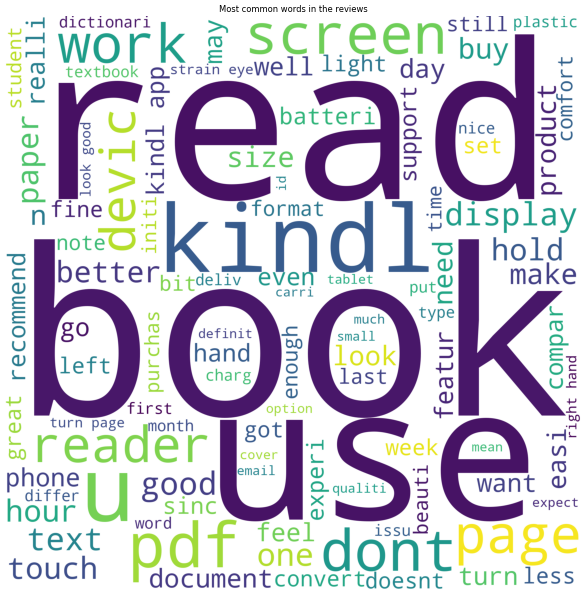

In [35]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(rv['Reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

# Sentiment Analysis

In [36]:
from textblob import TextBlob
rv['sentiment_score'] = rv['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
rv[['Reviews','sentiment_score']].head()

,Reviews,sentiment_score
0,initi impress light weight beauti display easi hold easi read thank vani one buy kindlei use kindl app smartphon pc quit year skeptic invest mere kindl reader book need purchas separ howev lockdown forc spend time phone pc leav strain eye also distractionswhatspp youtub etc high read internet connect devicesthi reader solv problem one go light hold hour distract free improv product xx best strain eye mean carri work amount time effect make product xxi law student book articl court judgment pdf legal document use larg font size equal space lot margin consum line page better convert mobi format onlin transfer page document read landscap mode howev advis buy pdf read text smallin boxkindl data cabl length decent qualitybuild qualiti plastic bodi matt finish wont fall hand display glass al...,0.187102
1,swipe speed slow like phone,-0.300000
2,worth everi pennyfor anyon avid reader need even someon read everi good purchasetalk devic screen look like actual book touch respons could better least that felt everyth els alreadi mention other,0.189286
3,good product buy person read ebook tri switch better devic person use read paperback may like product great realli deliv featur mention,0.666667
4,id read review peopl read book get kindl got basic version love got differ text size read comfort hold comfort read initi thought would small work fine readingimprov touch could bit respons dont expect anyth great batteri life specifi day expect lesser batteri goodread sync issu sometimesif want get back read would definit recommend,0.209524


In [37]:
## Defining function to assign sentiment category based on sentiment_score
## Score Range -0.5 to 0.5 is considered as neutral
def sentiment_category(score1):
    if(score1 > 0.5):
        return 'Positive'
    elif(score1 < -0.5):
        return 'Negative'
    else:
        return 'Neutral'

In [38]:
rv['sentiment'] = rv['sentiment_score'].apply(lambda x:sentiment_category(x))

In [39]:
rv.head()

,Reviews,sentiment_score,sentiment
0,initi impress light weight beauti display easi hold easi read thank vani one buy kindlei use kindl app smartphon pc quit year skeptic invest mere kindl reader book need purchas separ howev lockdown forc spend time phone pc leav strain eye also distractionswhatspp youtub etc high read internet connect devicesthi reader solv problem one go light hold hour distract free improv product xx best strain eye mean carri work amount time effect make product xxi law student book articl court judgment pdf legal document use larg font size equal space lot margin consum line page better convert mobi format onlin transfer page document read landscap mode howev advis buy pdf read text smallin boxkindl data cabl length decent qualitybuild qualiti plastic bodi matt finish wont fall hand display glass al...,0.187102,Neutral
1,swipe speed slow like phone,-0.300000,Neutral
2,worth everi pennyfor anyon avid reader need even someon read everi good purchasetalk devic screen look like actual book touch respons could better least that felt everyth els alreadi mention other,0.189286,Neutral
3,good product buy person read ebook tri switch better devic person use read paperback may like product great realli deliv featur mention,0.666667,Positive
4,id read review peopl read book get kindl got basic version love got differ text size read comfort hold comfort read initi thought would small work fine readingimprov touch could bit respons dont expect anyth great batteri life specifi day expect lesser batteri goodread sync issu sometimesif want get back read would definit recommend,0.209524,Neutral


In [40]:
## calculating the categories of sentiments and their counts
rv['sentiment'].value_counts()

Neutral     33
Positive     6
Negative     1
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

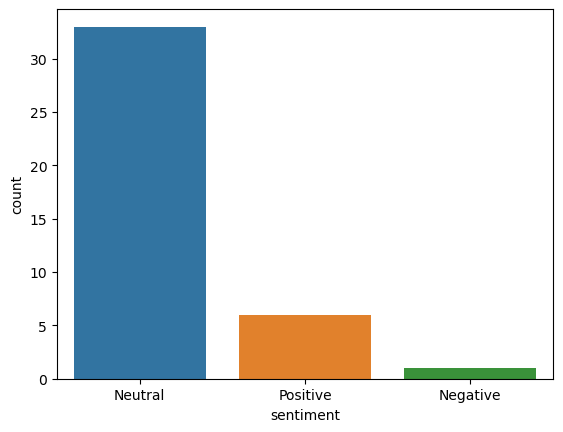

In [41]:
sns.countplot(x=rv['sentiment'])